# Задание 4 практикум Титушин - Тишина - Суроева

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('production-data.csv')
df

,unsullen.id,production.date,report.date,produced,defects,supplier
0,1.0,1,1,103.0,0.0,harpy.co
1,1.0,1,2,0.0,2.0,harpy.co
2,1.0,1,3,0.0,4.0,harpy.co
3,1.0,1,4,0.0,5.0,harpy.co
4,1.0,1,5,0.0,13.0,harpy.co
...,...,...,...,...,...,...
2695,100.0,5,5,109.0,0.0,westeros.inc
2696,100.0,5,6,0.0,11.0,westeros.inc
2697,100.0,5,7,0.0,6.0,westeros.inc
2698,100.0,6,6,110.0,0.0,westeros.inc


In [3]:
filter_harpy = (df['supplier'] == 'harpy.co')
filter_westeros = (df['supplier'] == 'westeros.inc')

produced_harpy = np.zeros(6)
produced_westeros = np.zeros(6)

defects_harpy = np.zeros(6)
defects_westeros = np.zeros(6)

for month in range(0, 6):
    produced_harpy[month] = df[filter_harpy & (df['production.date'] == (month + 1))]['produced'].sum()
    produced_westeros[month] = df[filter_westeros & (df['production.date'] == (month + 1))]['produced'].sum()
    defects_harpy[month] = df[filter_harpy & (df['report.date'] == (month + 2))]['defects'].sum()
    defects_westeros[month] = df[filter_westeros & (df['report.date'] == (month + 2))]['defects'].sum()
print(produced_harpy)
print(produced_westeros)
print(defects_harpy)
print(defects_westeros)

[5248. 5256. 5243. 5282. 5243. 5260.]
[5280. 5272. 5298. 5285. 5263. 5227.]
[ 126.  268.  402. 1180. 1777. 2327.]
[ 449.  852. 1290. 1573. 1915. 2189.]


In [4]:
print("Проивзедено всего Harpy & Co.:", np.sum(produced_harpy))
print("Произведено всего Westeros Inc.:", np.sum(produced_westeros))

print("Сломано всего Harpy & Co.:", np.sum(defects_harpy))
print("Сломано всего Westeros Inc.:", np.sum(defects_westeros))

print("Westeros Inc. произвела всего больше мечей в", np.sum(produced_westeros) / np.sum(produced_harpy), "раз")
print("У Harpy & Co. сломалось всего меньше мечей в", np.sum(defects_westeros) / np.sum(defects_harpy))

Проивзедено всего Harpy & Co.: 31532.0
Произведено всего Westeros Inc.: 31625.0
Сломано всего Harpy & Co.: 6080.0
Сломано всего Westeros Inc.: 8268.0
Westeros Inc. произвела всего больше мечей в 1.002949384751998 раз
У Harpy & Co. сломалось всего меньше мечей в 1.3598684210526315


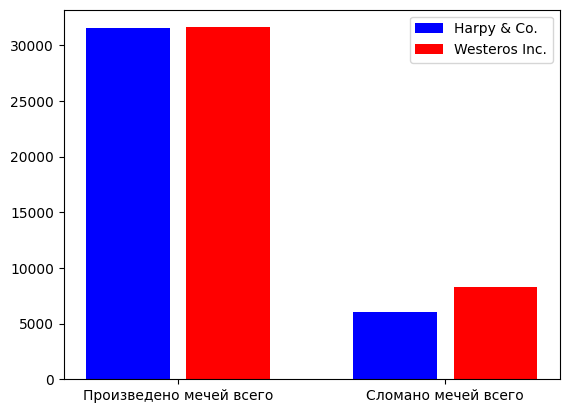

In [5]:
plt.bar([0, 0.8], [np.sum(produced_harpy), np.sum(defects_harpy)], color='b', width=0.25, label='Harpy & Co.')
plt.bar([0.3, 1.1], [np.sum(produced_westeros), np.sum(defects_westeros)], color='r', width=0.25, label='Westeros Inc.')
plt.xticks([0.15, 0.95], ['Произведено мечей всего', 'Сломано мечей всего'])
plt.legend()

In [6]:
print("Проивзедено в среднем Harpy & Co.:", np.mean(produced_harpy))
print("Произведено в среднем Westeros Inc.:", np.mean(produced_westeros))

print("Сломано в среднем Harpy & Co.:", np.mean(defects_harpy))
print("Сломано в среднем Westeros Inc.:", np.mean(defects_westeros))

print("Westeros Inc. в среднем произвела больше мечей в", np.mean(produced_westeros) / np.mean(produced_harpy), "раз")
print("У Harpy & Co. в среднем сломалось меньше мечей в", np.mean(defects_westeros) / np.mean(defects_harpy), "раз")

Проивзедено в среднем Harpy & Co.: 5255.333333333333
Произведено в среднем Westeros Inc.: 5270.833333333333
Сломано в среднем Harpy & Co.: 1013.3333333333334
Сломано в среднем Westeros Inc.: 1378.0
Westeros Inc. в среднем произвела больше мечей в 1.002949384751998 раз
У Harpy & Co. в среднем сломалось меньше мечей в 1.3598684210526315 раз


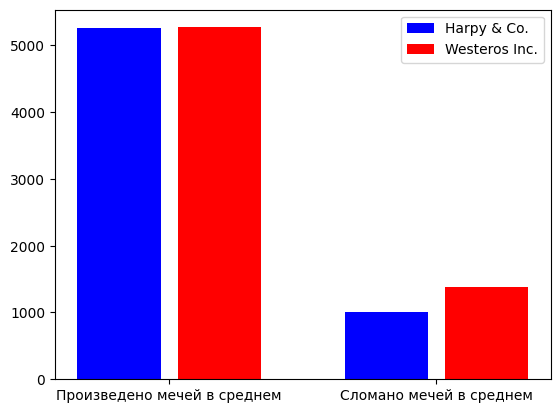

In [7]:
plt.bar([0, 0.8], [np.mean(produced_harpy), np.mean(defects_harpy)], color='b', width=0.25, label='Harpy & Co.')
plt.bar([0.3, 1.1], [np.mean(produced_westeros), np.mean(defects_westeros)], color='r', width=0.25, label='Westeros Inc.')
plt.xticks([0.15, 0.95], ['Произведено мечей в среднем', 'Сломано мечей в среднем'])
plt.legend()

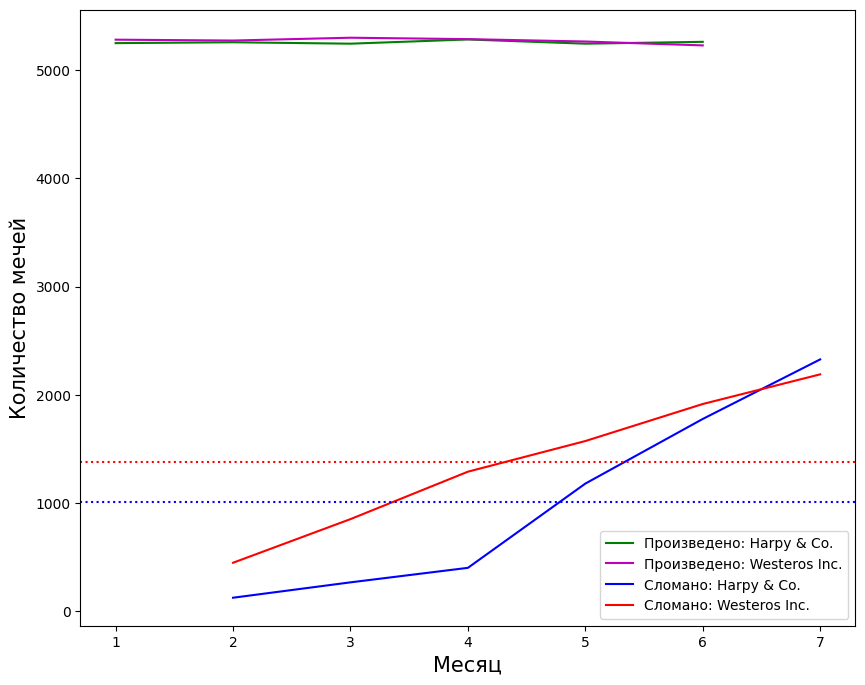

In [8]:
months_produced = np.array([1, 2, 3, 4, 5, 6])
months_defects = np.array([2, 3, 4, 5, 6, 7])

plt.figure(figsize =(10, 8))

plt.xlabel("Месяц", fontsize=15)
plt.ylabel("Количество мечей", fontsize=15)
plt.plot(months_produced, produced_harpy, c='g', label='Произведено: Harpy & Co.')
plt.plot(months_produced, produced_westeros, c='m', label='Произведено: Westeros Inc.')
plt.plot(months_defects, defects_harpy, c='b', label='Сломано: Harpy & Co.')
plt.plot(months_defects, defects_westeros, c='r', label='Сломано: Westeros Inc.')
plt.axhline(y=np.mean(defects_harpy), c='b', linestyle=':')
plt.axhline(y=np.mean(defects_westeros), c='r', linestyle=':')
plt.legend()

In [9]:
np.mean(produced_harpy)
np.mean(produced_westeros)

np

<module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'>

7.22772439983706
9.303246745088511
1.3598684210526317


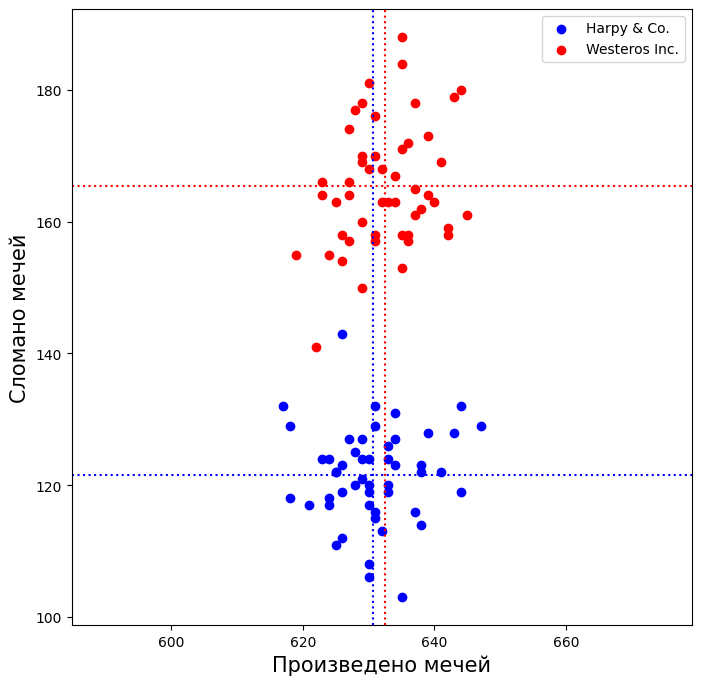

In [10]:
swords_produced = np.zeros(100)
swords_defects = np.zeros(100)

for i in range(100):
    swords_produced[i] = df[df['unsullen.id'] == (i + 1)]['produced'].sum()
    swords_defects[i] = df[df['unsullen.id'] == (i + 1)]['defects'].sum()

plt.figure(figsize =(8, 8))
plt.xlabel("Произведено мечей", fontsize=15)
plt.ylabel("Сломано мечей", fontsize=15)
plt.scatter(swords_produced[:50], swords_defects[:50], c='b', label='Harpy & Co.')
plt.scatter(swords_produced[50:], swords_defects[50:], c='r', label='Westeros Inc.')
plt.axhline(y=np.mean(swords_defects[:50]), c='b', linestyle=':')
plt.axhline(y=np.mean(swords_defects[50:]), c='r', linestyle=':')
plt.axvline(x=np.mean(swords_produced[:50]), c='b', linestyle=':')
plt.axvline(x=np.mean(swords_produced[50:]), c='r', linestyle=':')
plt.axis('equal')
plt.legend()

print(np.std(swords_defects[:50]))
print(np.std(swords_defects[50:]))
print(np.mean(swords_defects[50:]) / np.mean(swords_defects[:50]))